### 입력값 2개, 출력값 2개
### y1 = w1 * X1 + w2 * X2 + bias, y2 = w1 * X1 + w2 * X2 + bias

In [13]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np

import tensorflow as tf

# tensorflow 2.x에 내장된 Keras 사용
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

In [14]:
# 데이터
# x_train = np.array([[1, 5], [2, 6], [3, 7], [4, 8], [5, 9], [6, 10], [7, 11], [8, 12], [9, 13], [10, 14]])
x_train = np.array([[i, i] for i in range(1, 11)])
print(x_train.shape)
print(x_train[0].shape) # 한행의 구조
print(x_train)

(10, 2)
(2,)
[[ 1  1]
 [ 2  2]
 [ 3  3]
 [ 4  4]
 [ 5  5]
 [ 6  6]
 [ 7  7]
 [ 8  8]
 [ 9  9]
 [10 10]]


In [15]:
# 1 * 2 = 2, 5 * 2 = 10
# y_train = np.array([[2, 10], [4, 12], [6, 14], [8, 16], [10, 18], [12, 20], [14, 22], [16, 24], [18, 26], [20, 28]])
y_train = []
for i in range(len(x_train)): # [ 1  5]...
    y_train.append([x_train[i][0]+2, x_train[i][1]+5])

y_train = np.array(y_train)
print(y_train.shape)
print(y_train)

(10, 2)
[[ 3  6]
 [ 4  7]
 [ 5  8]
 [ 6  9]
 [ 7 10]
 [ 8 11]
 [ 9 12]
 [10 13]
 [11 14]
 [12 15]]


In [16]:
# del model # 객체 삭제
tf.random.set_seed(0)
model = Sequential()
model.add(Dense(60, input_dim=2, activation='linear')) 
model.add(Dense(80, activation='linear')) 
model.add(Dense(20, activation='linear')) 
model.add(Dense(2, activation='linear')) 
# model.compile(optimizer='adam', loss='mse')
model.compile(optimizer=Adam(lr=0.01), loss='mse')
model.summary()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=100, batch_size=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 60)                180       
_________________________________________________________________
dense_5 (Dense)              (None, 80)                4880      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1620      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 42        
Total params: 6,722
Trainable params: 6,722
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 26ms/step - loss: 65.2674 - val_loss: 55.9959
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 21.5604 - val_loss: 11.0656
Epoch 3/100
8/8 [==============================] - 

8/8 [==============================] - 0s 8ms/step - loss: 1.3584e-11 - val_loss: 2.9786e-11
Epoch 72/100
8/8 [==============================] - 0s 7ms/step - loss: 1.6868e-11 - val_loss: 2.9604e-10
Epoch 73/100
8/8 [==============================] - 0s 7ms/step - loss: 7.6229e-11 - val_loss: 2.2897e-10
Epoch 74/100
8/8 [==============================] - 0s 7ms/step - loss: 4.3988e-11 - val_loss: 1.3642e-12
Epoch 75/100
8/8 [==============================] - 0s 8ms/step - loss: 1.6664e-11 - val_loss: 4.3428e-11
Epoch 76/100
8/8 [==============================] - 0s 7ms/step - loss: 2.7525e-11 - val_loss: 2.1259e-10
Epoch 77/100
8/8 [==============================] - 0s 7ms/step - loss: 7.7375e-11 - val_loss: 6.1709e-10
Epoch 78/100
8/8 [==============================] - 0s 8ms/step - loss: 1.8113e-10 - val_loss: 4.5929e-11
Epoch 79/100
8/8 [==============================] - 0s 7ms/step - loss: 3.3285e-10 - val_loss: 4.2075e-09
Epoch 80/100
8/8 [==============================] - 0s 7ms/

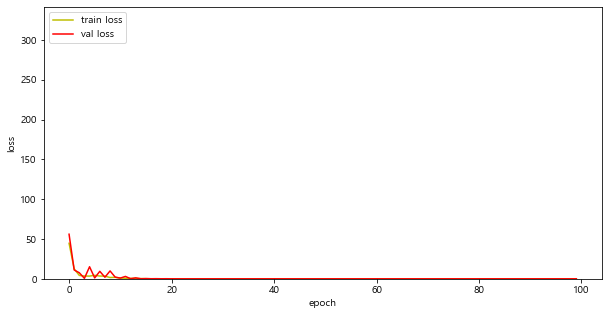

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 341.3603]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [18]:
x = np.array([[i, i] for i in range(100, 111)])
print(x.shape)
print(x[0].shape) # 한행의 구조
print(x)

(11, 2)
(2,)
[[100 100]
 [101 101]
 [102 102]
 [103 103]
 [104 104]
 [105 105]
 [106 106]
 [107 107]
 [108 108]
 [109 109]
 [110 110]]


In [19]:
y = []
for i in range(len(x)): # [ 1  5]...
    y.append([x[i][0]+2, x[i][1]+5])

y = np.array(y)
print(y.shape)
print(y)

(11, 2)
[[102 105]
 [103 106]
 [104 107]
 [105 108]
 [106 109]
 [107 110]
 [108 111]
 [109 112]
 [110 113]
 [111 114]
 [112 115]]


x: [100 100], 실제값: [102 105], 예측값: 102.00579 105.00424, 정제된값: 102 105
x: [101 101], 실제값: [103 106], 예측값: 103.00584 106.00430, 정제된값: 103 106
x: [102 102], 실제값: [104 107], 예측값: 104.00591 107.00433, 정제된값: 104 107
x: [103 103], 실제값: [105 108], 예측값: 105.00596 108.00438, 정제된값: 105 108
x: [104 104], 실제값: [106 109], 예측값: 106.00602 109.00441, 정제된값: 106 109
x: [105 105], 실제값: [107 110], 예측값: 107.00607 110.00446, 정제된값: 107 110
x: [106 106], 실제값: [108 111], 예측값: 108.00613 111.00450, 정제된값: 108 111
x: [107 107], 실제값: [109 112], 예측값: 109.00619 112.00455, 정제된값: 109 112
x: [108 108], 실제값: [110 113], 예측값: 110.00625 113.00458, 정제된값: 110 113
x: [109 109], 실제값: [111 114], 예측값: 111.00631 114.00462, 정제된값: 111 114
x: [110 110], 실제값: [112 115], 예측값: 112.00636 115.00467, 정제된값: 112 115


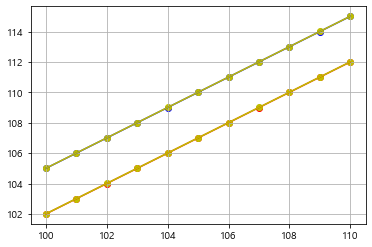

In [20]:
p = model.predict(x) # 모델 사용

for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.5f} {3:.5f}, 정제된값: {4:.0f} {5:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][1], p[i][0], p[i][1]))
    
plt.scatter(x[:,0], y[:,0], color='r')  # 실제값
plt.plot(x[:,0], y[:,0], color='r')
plt.scatter(x[:,0], p[:,0], color='y')  # 예측값
plt.plot(x[:,0], p[:,0], color='y')

plt.scatter(x[:,1], y[:,1], color='b')  # 실제값
plt.plot(x[:,1], y[:,1], color='b')
plt.scatter(x[:,1], p[:,1], color='y')  # 예측값
plt.plot(x[:,1], p[:,1], color='y')

plt.grid(True)
plt.show()    

In [21]:
model.save('./Basic4.h5')

In [22]:
!dir/w

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: DC48-5F8B

 C:\kd\ws_python\notebook\machine\dnn\lm 디렉터리

[.]                  [..]                 [.ipynb_checkpoints]
Basic1.ipynb         Basic1.png           Basic2.ipynb
Basic3.ipynb         Basic3.png           Basic4.h5
Basic4.ipynb         Basic4.png           model.png
               9개 파일             747,266 바이트
               3개 디렉터리  87,078,703,104 바이트 남음
